:# Projeto 1 de IF697 - Introdução a Ciência de Dados


*   Alunos: André Valença e Pedro Basílio
*   Professor: Luciano Barbosa
*   Documentação: https://github.com/ProfLuciano/cd/blob/gh-pages/slides/projeto1.pdf



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Coleta de dados

In [2]:
# Importando database do site da Associação Metropolitana de Ciclistas do Recife - AMECICLO

from urllib.request import urlopen
import json
url = "https://raw.githubusercontent.com/Ameciclo/perfil_do_ciclista/master/src/seed/seed.json"
response = urlopen(url)
data_json = json.loads(response.read())
l = []
for d in data_json:
  l.append(d["data"])

ciclistas = pd.DataFrame(l)

In [3]:
ciclistas.head(10)

,age,age_standard,biggest_issue,biggest_need,collisions,color_race,days_usage,distance_time,gender,job,motivation_to_continue,motivation_to_start,neighborhood_destiny,neighborhood_living,neighborhood_origin,schooling,transport_combination,wage_standard,years_using
0,43,de 1 a 2 Salários Mínimos,"Falta de infraestrutura adequada (ciclovias, b...",Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 1, 'school': 0, 'shopping': 0, 'to...",20.0,Masculino,Encanador,É mais rápido e prático,É mais rápido e prático,Boa Viagem,Imbiribeira,Imbiribeira,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",2000,entre 4 e 5 anos
1,32,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais segurança pública,Sim,Parda,"{'leisure': 1, 'school': 2, 'shopping': 0, 'to...",80.0,Masculino,Vendedor(a),É mais rápido e prático,É mais barato,Alto Dois Carneiros (Jaboatão Dos Guararapes),Alto Dois Carneiros (Jaboatão Dos Guararapes),Boa Viagem,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",2000,entre 4 e 5 anos
2,47,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 0, 'school': 6, 'shopping': 0, 'to...",30.0,Masculino,Vendedor Ambulante,É mais barato,É mais barato,Boa Viagem,Boa Viagem,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,"{'transportation': '', 'yes_no': False}",1000,entre 1 e 2 anos
3,20,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Parda,"{'leisure': 7, 'school': 2, 'shopping': 5, 'to...",10.0,Masculino,Soldado Do Exército,É mais rápido e prático,É mais rápido e prático,Cavaleiro (Jaboatão Dos Guararapes),Cavaleiro (Jaboatão Dos Guararapes),Pina,Ensino Médio (Segundo Grau),"{'transportation': 'Ônibus', 'yes_no': True}",1000,mais de 5 anos
4,53,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Preta,"{'leisure': 0, 'school': 1, 'shopping': 0, 'to...",30.0,Masculino,Pedreiro / Pintor,É mais rápido e prático,É mais rápido e prático,Afogados,Afogados,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,"{'transportation': '', 'yes_no': False}",950,mais de 5 anos
5,24,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais e melhores infraestruturas adequadas (cic...,Não,Branca,"{'leisure': 1, 'school': 4, 'shopping': 0, 'to...",60.0,Masculino,Encanador,É mais barato,É mais barato,San Martin,San Martin,Boa Viagem,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",1200,mais de 5 anos
6,53,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais e melhores infraestruturas adequadas (cic...,Não,Branca,"{'leisure': 1, 'school': 1, 'shopping': 0, 'to...",40.0,Masculino,Chefe De Cozinha,É mais barato,É mais rápido e prático,Afogados,Afogados,Boa Viagem,Ensino Médio (Segundo Grau),"{'transportation': '', 'yes_no': False}",2650,mais de 5 anos
7,41,de 1 a 2 Salários Mínimos,"Falta de infraestrutura adequada (ciclovias, b...",Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 2, 'school': 0, 'shopping': 0, 'to...",20.0,Masculino,Ajudante De Pedreiro,É mais rápido e prático,É mais barato,Imbiribeira,Imbiribeira,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,"{'transportation': '', 'yes_no': False}",940,mais de 5 anos
8,28,de 6 a 10 Salários Mínimos,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Sim,Parda,"{'leisure': 1, 'school': 2, 'shopping': 0, 'to...",25.0,Masculino,Representante Comercial,É mais saudável,É mais saudável,Boa Viagem,Ipsep,Ipsep,Ensino Médio (Segundo Grau),"{'transportation': '', 'yes_no': False}",7500,entre 2 e 3 anos
9,24,de 1 a 2 Salários Mínimos,Falta de segurança pública,Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 0, 'school': 0, 'shopping': 2, 'to...",30.0,Masculino,Caixa,É mais rápido e prático,É mais saudável,Boa Viagem,Ipsep,Ipsep,Ens

In [4]:
ciclistas.dtypes

age                         int64
age_standard               object
biggest_issue              object
biggest_need               object
collisions                 object
color_race                 object
days_usage                 object
distance_time             float64
gender                     object
job                        object
motivation_to_continue     object
motivation_to_start        object
neighborhood_destiny       object
neighborhood_living        object
neighborhood_origin        object
schooling                  object
transport_combination      object
wage_standard              object
years_using                object
dtype: object

In [5]:
ciclistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     500 non-null    int64  
 1   age_standard            500 non-null    object 
 2   biggest_issue           500 non-null    object 
 3   biggest_need            500 non-null    object 
 4   collisions              500 non-null    object 
 5   color_race              500 non-null    object 
 6   days_usage              500 non-null    object 
 7   distance_time           498 non-null    float64
 8   gender                  500 non-null    object 
 9   job                     500 non-null    object 
 10  motivation_to_continue  500 non-null    object 
 11  motivation_to_start     500 non-null    object 
 12  neighborhood_destiny    500 non-null    object 
 13  neighborhood_living     500 non-null    object 
 14  neighborhood_origin     500 non-null    ob

In [6]:
ciclistas.shape

(500, 19)

# 2. Pré-processamento de dados

### Definição de tipos

In [15]:
#for c in ciclistas["wage_standard"]:
 #if not type(c) is int:
  #  print(c)
   # print(type(c))

#Retirar loop:
df2 = ciclistas.groupby(['wage_standard']).size().reset_index().rename(columns={0:'contagem'})
df2.head(100)

,wage_standard,contagem
0,0,28
1,20,2
2,100,1
3,150,1
4,180,1
...,...,...
78,1 salário,3
79,Desempregado,1
80,Sal. Mínimo,1
81,Sal. mínimo,1


In [ ]:
# Dados inconsistentes. Removendo para transformar todos para int

ciclistas.loc[(ciclistas["wage_standard"] == "1 salário") | (ciclistas["wage_standard"] == "Sal. Mínimo") | (ciclistas["wage_standard"] == "Sal. mínimo"), "wage_standard"] = 1200
ciclistas.loc[(ciclistas["wage_standard"] == "Desempregado") | (ciclistas["wage_standard"] == "Sem renda"), "wage_standard"] = 0

# Dados inválidos

ciclistas = ciclistas[(ciclistas["wage_standard"] != "") & (ciclistas["wage_standard"] != "-")]

In [ ]:
ciclistas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     476 non-null    int64  
 1   age_standard            476 non-null    object 
 2   biggest_issue           476 non-null    object 
 3   biggest_need            476 non-null    object 
 4   collisions              476 non-null    object 
 5   color_race              476 non-null    object 
 6   days_usage              476 non-null    object 
 7   distance_time           474 non-null    float64
 8   gender                  476 non-null    object 
 9   job                     476 non-null    object 
 10  motivation_to_continue  476 non-null    object 
 11  motivation_to_start     476 non-null    object 
 12  neighborhood_destiny    476 non-null    object 
 13  neighborhood_living     476 non-null    object 
 14  neighborhood_origin     476 non-null    ob

In [ ]:
# categorização

ciclistas["biggest_issue"] = ciclistas["biggest_issue"].astype("category")
ciclistas["biggest_need"] = ciclistas["biggest_need"].astype("category")
ciclistas["gender"] = ciclistas["gender"].astype("category")
ciclistas["motivation_to_continue"] = ciclistas["motivation_to_continue"].astype("category")
ciclistas["motivation_to_start"] = ciclistas["motivation_to_start"].astype("category")
ciclistas["schooling"] = ciclistas["schooling"].astype("category")
ciclistas["wage_standard"] = ciclistas["wage_standard"].astype("int")

In [ ]:
# removendo irrelevantes

# ciclistas = ciclistas.drop(["age_standard", "collisions", "color_race", "days_usage", "job", "neighborhood_destiny", "neighborhood_origin", "schooling", "transport_combination", "years_using"], axis="columns")

# André, acredito que as informações de colisão, raça, e distância podem ser relevantes para uma análise futura.
ciclistas = ciclistas.drop(["age_standard"], axis="columns")

In [ ]:
ciclistas.head()

,age,biggest_issue,biggest_need,collisions,color_race,days_usage,distance_time,gender,job,motivation_to_continue,motivation_to_start,neighborhood_destiny,neighborhood_living,neighborhood_origin,schooling,transport_combination,wage_standard,years_using
0,43,"Falta de infraestrutura adequada (ciclovias, b...",Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 1, 'school': 0, 'shopping': 0, 'to...",20.0,Masculino,Encanador,É mais rápido e prático,É mais rápido e prático,Boa Viagem,Imbiribeira,Imbiribeira,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",2000,entre 4 e 5 anos
1,32,Falta de segurança no trânsito,Mais segurança pública,Sim,Parda,"{'leisure': 1, 'school': 2, 'shopping': 0, 'to...",80.0,Masculino,Vendedor(a),É mais rápido e prático,É mais barato,Alto Dois Carneiros (Jaboatão Dos Guararapes),Alto Dois Carneiros (Jaboatão Dos Guararapes),Boa Viagem,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",2000,entre 4 e 5 anos
2,47,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 0, 'school': 6, 'shopping': 0, 'to...",30.0,Masculino,Vendedor Ambulante,É mais barato,É mais barato,Boa Viagem,Boa Viagem,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,"{'transportation': '', 'yes_no': False}",1000,entre 1 e 2 anos
3,20,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Parda,"{'leisure': 7, 'school': 2, 'shopping': 5, 'to...",10.0,Masculino,Soldado Do Exército,É mais rápido e prático,É mais rápido e prático,Cavaleiro (Jaboatão Dos Guararapes),Cavaleiro (Jaboatão Dos Guararapes),Pina,Ensino Médio (Segundo Grau),"{'transportation': 'Ônibus', 'yes_no': True}",1000,mais de 5 anos
4,53,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Preta,"{'leisure': 0, 'school': 1, 'shopping': 0, 'to...",30.0,Masculino,Pedreiro / Pintor,É mais rápido e prático,É mais rápido e prático,Afogados,Afogados,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,"{'transportation': '', 'yes_no': False}",950,mais de 5 anos


In [ ]:
#Análise das informações da coluna: "days_usage"
ciclistas["days_usage"].head()

0    {'leisure': 1, 'school': 0, 'shopping': 0, 'to...
1    {'leisure': 1, 'school': 2, 'shopping': 0, 'to...
2    {'leisure': 0, 'school': 6, 'shopping': 0, 'to...
3    {'leisure': 7, 'school': 2, 'shopping': 5, 'to...
4    {'leisure': 0, 'school': 1, 'shopping': 0, 'to...
Name: days_usage, dtype: object

In [ ]:
#Dividindo a informação "Days_usage" em várias colunas para conseguir medir:

objs = [ciclistas, pd.DataFrame(ciclistas['days_usage'].tolist())]
ciclistas = pd.concat(objs, axis=1).drop('days_usage', axis=1)

In [ ]:
ciclistas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     476 non-null    float64 
 1   biggest_issue           476 non-null    category
 2   biggest_need            476 non-null    category
 3   collisions              476 non-null    object  
 4   color_race              476 non-null    object  
 5   distance_time           474 non-null    float64 
 6   gender                  476 non-null    category
 7   job                     476 non-null    object  
 8   motivation_to_continue  476 non-null    category
 9   motivation_to_start     476 non-null    category
 10  neighborhood_destiny    476 non-null    object  
 11  neighborhood_living     476 non-null    object  
 12  neighborhood_origin     476 non-null    object  
 13  schooling               476 non-null    category
 14  transport_combination   47

In [ ]:
ciclistas.head()

,age,biggest_issue,biggest_need,collisions,color_race,distance_time,gender,job,motivation_to_continue,motivation_to_start,...,neighborhood_origin,schooling,transport_combination,wage_standard,years_using,leisure,school,shopping,total,working
0,43.0,"Falta de infraestrutura adequada (ciclovias, b...",Mais segurança/educação no trânsito,Não,Branca,20.0,Masculino,Encanador,É mais rápido e prático,É mais rápido e prático,...,Imbiribeira,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",2000.0,entre 4 e 5 anos,1.0,0.0,0.0,5.0,5.0
1,32.0,Falta de segurança no trânsito,Mais segurança pública,Sim,Parda,80.0,Masculino,Vendedor(a),É mais rápido e prático,É mais barato,...,Boa Viagem,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",2000.0,entre 4 e 5 anos,1.0,2.0,0.0,5.0,5.0
2,47.0,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Branca,30.0,Masculino,Vendedor Ambulante,É mais barato,É mais barato,...,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,"{'transportation': '', 'yes_no': False}",1000.0,entre 1 e 2 anos,0.0,6.0,0.0,6.0,6.0
3,20.0,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Parda,10.0,Masculino,Soldado Do Exército,É mais rápido e prático,É mais rápido e prático,...,Pina,Ensino Médio (Segundo Grau),"{'transportation': 'Ônibus', 'yes_no': True}",1000.0,mais de 5 anos,7.0,2.0,5.0,7.0,5.0
4,53.0,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Preta,30.0,Masculino,Pedreiro / Pintor,É mais rápido e prático,É mais rápido e prático,...,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,"{'transportation': '', 'yes_no': False}",950.0,mais de 5 anos,0.0,1.0,0.0,7.0,7.0


In [ ]:
#Renomeando as colunas dos dias de uso
ciclistas.rename(columns = {'leisure':'days_usage_leisure', 'school':'days_usage_school', 'shopping':'days_usage_shopping', 'total':'days_usage_total', 'working':'days_usage_working'}, inplace = True)
ciclistas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     476 non-null    float64 
 1   biggest_issue           476 non-null    category
 2   biggest_need            476 non-null    category
 3   collisions              476 non-null    object  
 4   color_race              476 non-null    object  
 5   distance_time           474 non-null    float64 
 6   gender                  476 non-null    category
 7   job                     476 non-null    object  
 8   motivation_to_continue  476 non-null    category
 9   motivation_to_start     476 non-null    category
 10  neighborhood_destiny    476 non-null    object  
 11  neighborhood_living     476 non-null    object  
 12  neighborhood_origin     476 non-null    object  
 13  schooling               476 non-null    category
 14  transport_combination   47

### Tratamentos de dados ausentes

In [ ]:
# Tirando linhas com valores nulos

ciclistas = ciclistas.dropna()
ciclistas.count()

age                       450
biggest_issue             450
biggest_need              450
collisions                450
color_race                450
distance_time             450
gender                    450
job                       450
motivation_to_continue    450
motivation_to_start       450
neighborhood_destiny      450
neighborhood_living       450
neighborhood_origin       450
schooling                 450
transport_combination     450
wage_standard             450
years_using               450
days_usage_leisure        450
days_usage_school         450
days_usage_shopping       450
days_usage_total          450
days_usage_working        450
dtype: int64

### Normalização

In [ ]:
# Um tipo de normalização possível é o método Min-Max.
# Podemos normalizar os valores do wage_standard, por exemplo,
# para algo entre 0 e 1

ciclistas['wage_standard_normalized'] = (ciclistas['wage_standard'] - ciclistas['wage_standard'].min()) / (ciclistas['wage_standard'].max() - ciclistas['wage_standard'].min())
ciclistas['wage_standard_normalized'].describe()

count    406.000000
mean       0.143887
std        0.138537
min        0.000000
25%        0.080889
50%        0.098146
75%        0.141767
max        1.000000
Name: wage_standard_normalized, dtype: float64

In [ ]:
ciclistas.sort_values(by="wage_standard_normalized")

,age,biggest_issue,biggest_need,collisions,color_race,distance_time,gender,job,motivation_to_continue,motivation_to_start,...,transport_combination,wage_standard,years_using,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working,log_wage,wage_standard_normalized
316,38.0,Falta de sinalização,Mais segurança pública,Sim,Parda,15.0,Masculino,Entregador(a) De Água,É mais rápido e prático,É mais rápido e prático,...,"{'transportation': '', 'yes_no': False}",200.0,mais de 5 anos,1.0,2.0,0.0,6.0,6.0,2.301030,0.000000
218,22.0,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Preta,5.0,Masculino,Faz Serviços Avulsos,É mais barato,É mais rápido e prático,...,"{'transportation': '', 'yes_no': False}",200.0,mais de 5 anos,2.0,0.0,0.0,7.0,7.0,2.301030,0.000000
201,45.0,"Falta de infraestrutura adequada (ciclovias, b...",Mais segurança pública,Não,Parda,15.0,Masculino,Desempregada(o),Outros,É mais rápido e prático,...,"{'transportation': '', 'yes_no': False}",200.0,mais de 5 anos,2.0,0.0,0.0,7.0,0.0,2.301030,0.000000
121,55.0,Falta de segurança no trânsito,Mais e melhores infraestruturas adequadas (cic...,Não,Preta,30.0,Masculino,Mecânico De Bicicleta,É mais rápido e prático,É mais rápido e prático,...,"{'transportation': '', 'yes_no': False}",250.0,mais de 5 anos,2.0,0.0,0.0,6.0,5.0,2.397940,0.005453
21,46.0,Falta de segurança pública,Mais segurança pública,Sim,Preta,40.0,Masculino,Lavador De Carros,É mais rápido e prático,É mais rápido e prático,...,"{'transportation': '', 'yes_no': False}",260.0,mais de 5 anos,0.0,0.0,0.0,7.0,7.0,2.414973,0.006543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,38.0,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Branca,20.0,Masculino,Cozinheira(o)(o),Outros,Outros,...,"{'transportation': '', 'yes_no': False}",8000.0,mais de 5 anos,1.0,0.0,0.0,3.0,3.0,3.903090,0.850600
274,30.0,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Branca,7.0,Masculino,Consultor De Ti,É mais rápido e prático,É mais rápido e prático,...,"{'transportation': '', 'yes_no': False}",8000.0,entre 6 meses e 1 ano,6.0,3.0,0.0,7.0,2.0,3.903090,0.850600
258,51.0,Falta de segurança no trânsito,Mais e melhores infraestruturas adequadas (cic...,Não,Preta,60.0,Masculino,Montador De Eventos,É mais saudável,É ambientalmente correto,...,"{'transportation': '', 'yes_no': False}",8000.0,mais de 5 anos,2.0,7.0,0.0,7.0,7.0,3.903090,0.850600
299,30.0,"Falta de infraestrutura adequada (ciclovias, b...",Mais segurança/educação no trânsito,Não,Branca,10.0,Masculino,Educador Físico,É mais rápido e prático,É mais rápido e prático,...,"{'transportation': 'Barco', 'yes_no': True}",9000.0,entre 1 e 2 anos,6.0,0.0,5.0,7.0,6.0,3.954243,0.959651


### Discretização
Uma possível discretização é a faixa etária. Separar entre jovens, adultos e velhos. Apenas de maneira ilustrativa, utilizamos o "cut", que separa por intervalo, e atribuímos labels que correspondem às idades.

In [ ]:
ciclistas.sort_values(by="age")["age"]

285    16.0
284    16.0
106    16.0
219    17.0
38     17.0
       ... 
269    69.0
189    70.0
67     71.0
162    74.0
108    74.0
Name: age, Length: 406, dtype: float64

In [ ]:
# Divide em quatro partes de acordo com o intervalo de idade.
# É interessante inclusive para ver que o número de pessoas jovens
# e adultas pedalantes é bem maior que o dos outros dois grupos.
pd.cut(ciclistas["age"], 4).value_counts()

(15.942, 30.5]    161
(30.5, 45.0]      150
(45.0, 59.5]       78
(59.5, 74.0]       17
Name: age, dtype: int64

In [ ]:
labels = ["jovem", "adulto", "meia_idade", "idoso"]
ciclistas["faixa_etaria"] = pd.qcut(ciclistas["age"], q=4, labels=labels)

In [ ]:
ciclistas[["age","faixa_etaria"]].head(20)

,age,faixa_etaria
0,43.0,meia_idade
1,32.0,adulto
2,47.0,idoso
3,20.0,jovem
4,53.0,idoso
5,24.0,jovem
6,53.0,idoso
7,41.0,meia_idade
8,28.0,adulto
9,24.0,jovem


In [ ]:
# Fazer isso com qcut, ele distribuiria pela frequência e não pela faixa,
# para deixar bins com tamanhos aproximadamente iguais.
pd.qcut(ciclistas["age"], 3).value_counts()

(15.999, 29.0]    149
(41.0, 74.0]      133
(29.0, 41.0]      124
Name: age, dtype: int64

In [ ]:
# Para maior controle, podemos inserir o percentual manualmente
ciclistas["age"].describe()

count    406.000000
mean      36.128079
std       12.337171
min       16.000000
25%       27.000000
50%       34.000000
75%       45.000000
max       74.000000
Name: age, dtype: float64

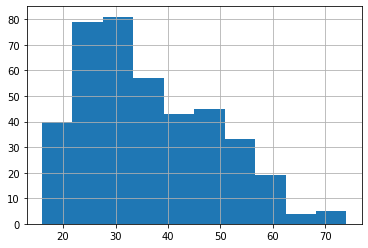

In [ ]:
ciclistas["age"].hist()

In [ ]:
# Dá para inserir os percentis manualmente e separar, como aqui,
# entre menor de idade, adulto e idoso
pd.qcut(ciclistas["age"], q=[0, .01, .98, 1]).value_counts()

(17.05, 63.8]      392
(63.8, 74.0]         9
(15.999, 17.05]      5
Name: age, dtype: int64

### Limpeza
Utilizando o método Tukey

In [ ]:
# Verificando idade

ciclistas["age"].describe()

count    450.000000
mean      35.015556
std       12.635801
min       12.000000
25%       25.000000
50%       32.000000
75%       44.000000
max       74.000000
Name: age, dtype: float64

In [ ]:
# Não pode ter completado o ensino fundamental e ter 12 anos de idade,
# pedalar na rua há mais de 5 anos e ser pintor.
# Certamente é um dado discrepante.

ciclistas[ciclistas["age"] < 16]

,age,biggest_issue,biggest_need,collisions,color_race,distance_time,gender,job,motivation_to_continue,motivation_to_start,...,neighborhood_origin,schooling,transport_combination,wage_standard,years_using,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working
90,15.0,"Falta de infraestrutura adequada (ciclovias, b...",Mais e melhores infraestruturas adequadas (cic...,Não,Parda,10.0,Masculino,Estudante / Ajuda A Mãe No Trabalho,É mais rápido e prático,É mais rápido e prático,...,Boa Viagem,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",0.0,entre 1 e 2 anos,2.0,1.0,5.0,5.0,4.0
125,15.0,Falta de segurança no trânsito,Mais e melhores infraestruturas adequadas (cic...,Sim,Branca,20.0,Masculino,Estudante,É mais barato,É mais rápido e prático,...,Campo Grande,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': 'Ônibus', 'yes_no': True}",0.0,mais de 5 anos,5.0,2.0,7.0,7.0,0.0
149,13.0,Falta de sinalização,Mais sinalização,Não,Parda,15.0,Masculino,Estudante,É mais rápido e prático,Outros,...,Encruzilhada,Sem instrução (nunca frequentou a escola ou pr...,"{'transportation': '', 'yes_no': False}",0.0,entre 3 e 4 anos,3.0,0.0,0.0,3.0,0.0
176,13.0,Falta de segurança no trânsito,Mais e melhores infraestruturas adequadas (cic...,Não,Preta,5.0,Masculino,Estudante,É mais rápido e prático,É mais saudável,...,Boa Vista,Sem instrução (nunca frequentou a escola ou pr...,"{'transportation': '', 'yes_no': False}",0.0,mais de 5 anos,2.0,3.0,0.0,7.0,0.0
247,14.0,Sem resposta,Mais segurança/educação no trânsito,Não,Branca,10.0,Masculino,Estudante,É mais barato,É mais rápido e prático,...,Afogados,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': 'Ônibus', 'yes_no': True}",0.0,mais de 5 anos,1.0,1.0,5.0,7.0,0.0
248,14.0,Falta de segurança no trânsito,Mais e melhores infraestruturas adequadas (cic...,Não,Branca,5.0,Masculino,Estudante,É mais rápido e prático,É mais rápido e prático,...,Afogados,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': 'Ônibus', 'yes_no': True}",0.0,mais de 5 anos,3.0,0.0,0.0,3.0,0.0
460,15.0,Falta de segurança pública,Mais e melhores infraestruturas adequadas (cic...,Não,Parda,5.0,Masculino,Estudante,É mais rápido e prático,É mais saudável,...,Cordeiro,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",0.0,entre 1 e 2 anos,5.0,0.0,0.0,7.0,5.0
462,12.0,"Falta de infraestrutura adequada (ciclovias, b...",Mais e melhores infraestruturas adequadas (cic...,Não,Preta,15.0,Masculino,Pintor,É mais rápido e prático,Outros,...,Cordeiro,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",1000.0,mais de 5 anos,4.0,3.0,0.0,7.0,5.0
473,13.0,Falta de segurança pública,Mais sinalização,Não,Preta,30.0,Masculino,Estudante,Outros,Outros,...,Casa Forte,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",20.0,entre 4 e 5 anos,1.0,1.0,0.0,6.0,6.0


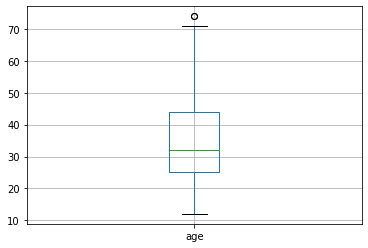

In [ ]:
ciclistas.boxplot(column="age")

In [ ]:
ciclistas = ciclistas[ciclistas["age"] > 12]
ciclistas["age"]

0      43.0
1      32.0
2      47.0
3      20.0
4      53.0
       ... 
470    51.0
472    31.0
473    13.0
474    26.0
475    18.0
Name: age, Length: 449, dtype: float64

In [ ]:
# Se houvesse valor acima de 7, estaria errado, mas não há. segue o bonde

ciclistas["days_usage_total"].describe()

count    449.000000
mean       6.042316
std        1.260842
min        1.000000
25%        5.000000
50%        7.000000
75%        7.000000
max        7.000000
Name: days_usage_total, dtype: float64

In [ ]:
# aparentemente de boa também. O valor 0 é dos estudantes

ciclistas["wage_standard"].describe()

count      449.000000
mean      1445.135857
std       1498.194777
min          0.000000
25%        937.000000
50%       1000.000000
75%       1500.000000
max      15000.000000
Name: wage_standard, dtype: float64

# 3. Estatística Descritiva / Análise de Dados

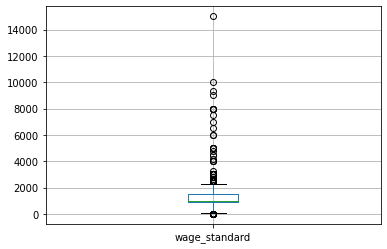

In [ ]:
ciclistas.boxplot(column="wage_standard")

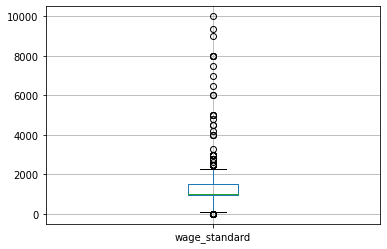

In [ ]:
# removendo outlier
ciclistas = ciclistas[ciclistas["wage_standard"] < 12000]
ciclistas.boxplot(column="wage_standard")

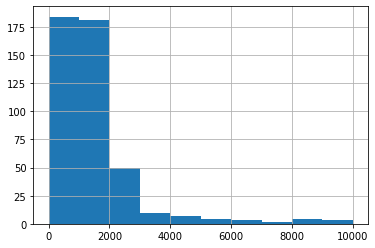

In [ ]:
# Aqui, percebe-se que o grosso dos ciclistas ganha abaixo de 2000.
# E que, pela curva logarítmica, quanto maior o salário, menos o pedala

ciclistas["wage_standard"].hist()

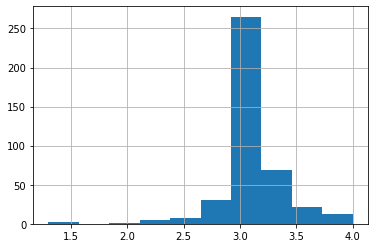

In [ ]:
# Ao aplicar o log, vê-se melhor que
# o grosso dos ciclistas ganha entre 600 e 2000

ciclistas['log_wage'] = ciclistas['wage_standard'].apply(np.log10)
ciclistas[ciclistas['log_wage'] > 0]['log_wage'].hist()

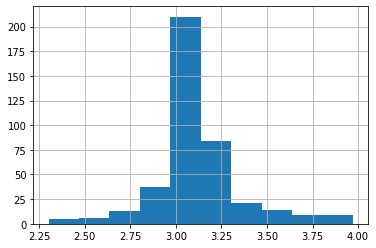

In [ ]:
ciclistas = ciclistas[(ciclistas["log_wage"] > 2.3) & (ciclistas["log_wage"] < 4)]
ciclistas["log_wage"].hist()

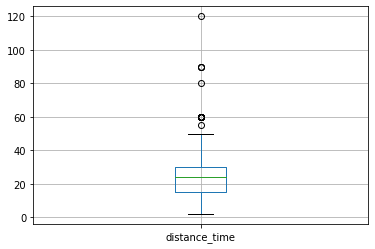

In [ ]:
ciclistas.boxplot(column="distance_time")

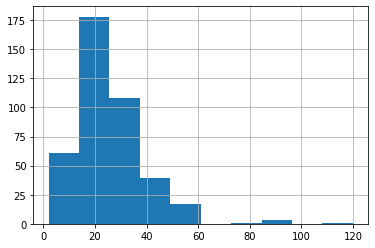

In [ ]:
ciclistas["distance_time"].hist()

In [ ]:
# Removendo outlier (tempo muito pequeno e muito grande)

ciclistas = ciclistas[(ciclistas["distance_time"].apply(np.log10) > 0.5) & (ciclistas["distance_time"] < 100.0)]

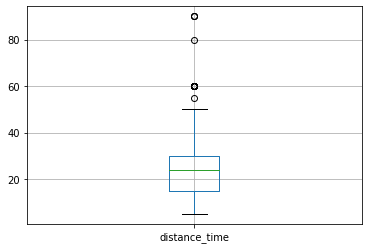

In [ ]:
ciclistas.boxplot(column="distance_time")

In [ ]:
ciclistas["wage_standard"].describe()

count     406.000000
mean     1519.448276
std      1270.381979
min       200.000000
25%       941.750000
50%      1100.000000
75%      1500.000000
max      9370.000000
Name: wage_standard, dtype: float64

In [ ]:
ciclistas["wage_standard"].var()

1613870.371392082

In [ ]:
ciclistas["wage_standard"].mode()

0    1200.0
dtype: float64

In [ ]:
ciclistas["distance_time"].describe()

count    406.000000
mean      25.236453
std       13.256380
min        5.000000
25%       15.000000
50%       24.000000
75%       30.000000
max       90.000000
Name: distance_time, dtype: float64

In [ ]:
ciclistas["distance_time"].var()

175.73160615459466

In [ ]:
ciclistas["distance_time"].mode()

0    30.0
dtype: float64

In [ ]:
ciclistas.groupby(["gender"]).count()

,age,biggest_issue,biggest_need,collisions,color_race,distance_time,job,motivation_to_continue,motivation_to_start,neighborhood_destiny,...,schooling,transport_combination,wage_standard,years_using,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working,log_wage
gender,,,,,,,,,,,,,,,,,,,,,
Feminino,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
Masculino,328,328,328,328,328,328,328,328,328,328,...,328,328,328,328,328,328,328,328,328,328
Outro,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# 4.3 vezes mais ciclistas homens do que mulheres, embora haja mais mulheres que
# homens na cidade do Recife. O que depreendemos disso? Segurança? Lá embaixo
# vamos ver isso nas hipótese?

(ciclistas[ciclistas["gender"] == "Masculino"]["gender"].count())/(ciclistas[ciclistas["gender"] == "Feminino"]["gender"].count())

4.259740259740259

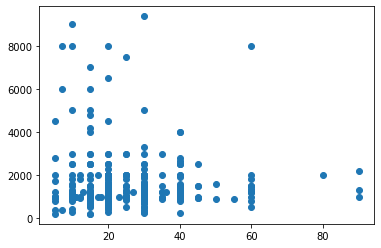

In [ ]:
# Dá para perceber que, de maneira geral, o salário vai abaixando
# à medida que o tempo de deslocamento vai aumentando.

plt.scatter(ciclistas["distance_time"], ciclistas["wage_standard"])

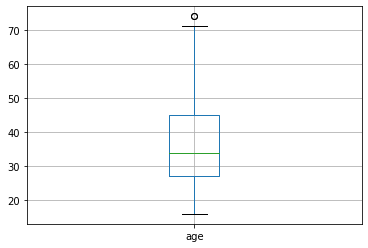

In [ ]:
ciclistas.boxplot(column="age")

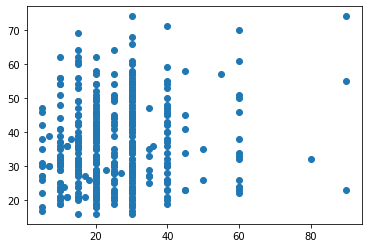

In [ ]:
plt.scatter(ciclistas["distance_time"], ciclistas["age"])

In [ ]:
# Isso se sustenta ao observar a covariância negativa entre os dois

ciclistas.drop(["log_wage"], axis=1).cov()

,age,distance_time,wage_standard,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working
age,152.205778,24.305443,1.276002e+03,0.093645,1.191851,-5.176318,0.568862,-1.205644
distance_time,24.305443,175.731606,-7.245359e+02,0.166235,0.709931,-3.724941,-1.709907,-2.434921
wage_standard,1276.001703,-724.535888,1.613870e+06,327.845040,105.956662,33.027331,-67.425032,-221.681481
days_usage_leisure,0.093645,0.166235,3.278450e+02,3.071806,0.690446,0.634197,0.318202,-0.614286
days_usage_school,1.191851,0.709931,1.059567e+02,0.690446,2.581475,0.375199,0.464064,0.018695
days_usage_shopping,-5.176318,-3.724941,3.302733e+01,0.634197,0.375199,4.006672,0.192653,-0.430159
days_usage_total,0.568862,-1.709907,-6.742503e+01,0.318202,0.464064,0.192653,1.493353,1.152028
days_usage_working,-1.205644,-2.434921,-2.216815e+02,-0.614286,0.018695,-0.430159,1.152028,3.844268


In [ ]:
ciclistas.drop(["log_wage"], axis=1).corr(method="pearson")

,age,distance_time,wage_standard,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working
age,1.000000,0.148615,0.081414,0.004331,0.060127,-0.209611,0.037732,-0.049842
distance_time,0.148615,1.000000,-0.043023,0.007155,0.033332,-0.140379,-0.105552,-0.093681
wage_standard,0.081414,-0.043023,1.000000,0.147244,0.051911,0.012988,-0.043432,-0.089000
days_usage_leisure,0.004331,0.007155,0.147244,1.000000,0.245188,0.180774,0.148568,-0.178759
days_usage_school,0.060127,0.033332,0.051911,0.245188,1.000000,0.116664,0.236354,0.005934
days_usage_shopping,-0.209611,-0.140379,0.012988,0.180774,0.116664,1.000000,0.078760,-0.109605
days_usage_total,0.037732,-0.105552,-0.043432,0.148568,0.236354,0.078760,1.000000,0.480812
days_usage_working,-0.049842,-0.093681,-0.089000,-0.178759,0.005934,-0.109605,0.480812,1.000000


In [ ]:
ciclistas.drop(["log_wage"], axis=1).corr(method="spearman")

,age,distance_time,wage_standard,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working
age,1.000000,0.127526,0.091855,-0.000223,0.004407,-0.213550,0.039525,0.014917
distance_time,0.127526,1.000000,0.016971,0.039541,0.052981,-0.149995,-0.106091,-0.099404
wage_standard,0.091855,0.016971,1.000000,0.116010,0.050739,0.015852,-0.008182,-0.097398
days_usage_leisure,-0.000223,0.039541,0.116010,1.000000,0.247270,0.179211,0.124109,-0.183763
days_usage_school,0.004407,0.052981,0.050739,0.247270,1.000000,0.116263,0.223536,0.000431
days_usage_shopping,-0.213550,-0.149995,0.015852,0.179211,0.116263,1.000000,0.069392,-0.120115
days_usage_total,0.039525,-0.106091,-0.008182,0.124109,0.223536,0.069392,1.000000,0.438481
days_usage_working,0.014917,-0.099404,-0.097398,-0.183763,0.000431,-0.120115,0.438481,1.000000


## Testes de hipótese

In [ ]:
from scipy import stats

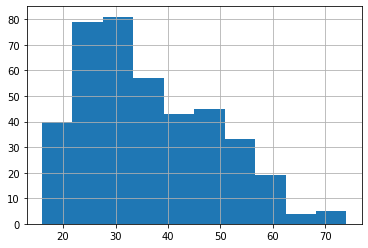

In [ ]:
ciclistas["age"].hist()

In [ ]:
stats.shapiro(ciclistas['age'])

ShapiroResult(statistic=0.9561542272567749, pvalue=1.2418199801800256e-09)

In [ ]:
# uma hipotese pode ser que mulheres nao usam bike por inseguranca

ciclistas[ciclistas["gender"]=="Feminino"].groupby(["biggest_need"]).count()

,age,biggest_issue,collisions,color_race,distance_time,gender,job,motivation_to_continue,motivation_to_start,neighborhood_destiny,...,schooling,transport_combination,wage_standard,years_using,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working,log_wage
biggest_need,,,,,,,,,,,,,,,,,,,,,
"Mais e melhores infraestruturas adequadas (ciclovias, bicicletários, etc.)",45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
Mais segurança pública,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Mais segurança/educação no trânsito,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
Mais sinalização,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Outros,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# uma hipotese pode ser que mulheres nao usam bike por inseguranca

ciclistas[ciclistas["gender"]=="Masculino"].groupby(["biggest_need"]).count()

,age,biggest_issue,collisions,color_race,distance_time,gender,job,motivation_to_continue,motivation_to_start,neighborhood_destiny,...,schooling,transport_combination,wage_standard,years_using,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working,log_wage
biggest_need,,,,,,,,,,,,,,,,,,,,,
"Mais e melhores infraestruturas adequadas (ciclovias, bicicletários, etc.)",178,178,178,178,178,178,178,178,178,178,...,178,178,178,178,178,178,178,178,178,178
Mais segurança pública,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
Mais segurança/educação no trânsito,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
Mais sinalização,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Outros,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


# 4. Teste de Hipótese